<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/SLR(Question_1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

Load the dataset

In [ ]:
data1=pd.read_csv("/content/delivery_time.csv")
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Exploratory Data Analysis and Data Visualisation

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


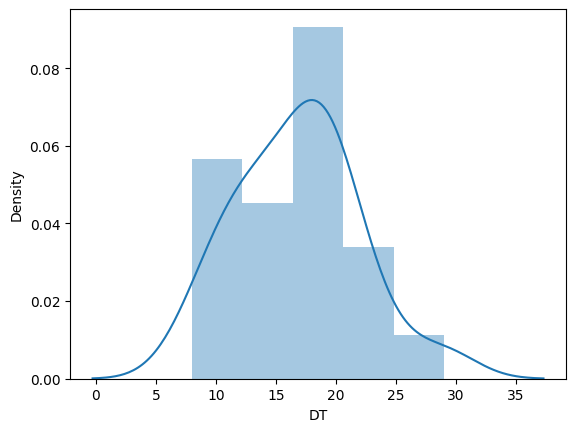

In [ ]:
sns.distplot(data1["DT"])
plt.show()

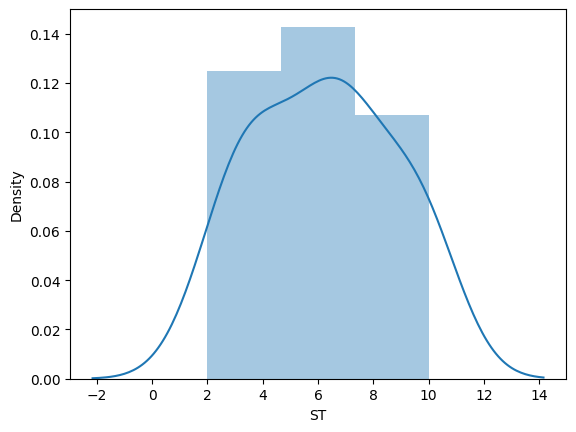

In [ ]:
sns.distplot(data1["ST"])
plt.show()

Feature Engineering

In [ ]:
data1=data1.rename({"Delivery Time":"DT","Sorting Time":"ST"},axis=1)
data1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Correlation Analysis

In [ ]:
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


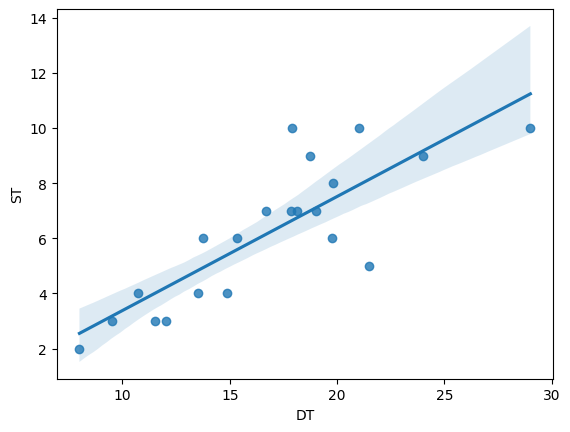

In [ ]:
sns.regplot(x=data1["DT"],y=data1["ST"])
plt.show()

Model Building

In [ ]:
model=smf.ols("DT~ST",data=data1).fit()

In [ ]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

Model Testing

In [ ]:
model.tvalues,model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model Prediction

In [ ]:
DT=1.649020*5+6.582734
DT

14.827834

In [ ]:
new_data=pd.DataFrame([5,8],columns=["ST"])
new_data

,ST
0,5
1,8


In [ ]:
model.predict(new_data)

0    14.827833
1    19.774893
dtype: float64